# <h1><center>Spatial Operations</center></h1>

## 3.3 - Buffer Analysis

Buffer analysis is an important geoprocessing task. It is used widely in many domains to get a distance around a point/Line/Polygon. One tricky thing here is you need to know which CRS/projection you are using to get the correct output you want. If your data is not projected into projection where meters are used, then the output will not be in meters. This is a classical error in the world of Geodata. You can use this resource to find out which crs you need and which units are used: http://spatialreference.org/ref/epsg/sweref99-tm/


### Learning Objectives:

1. Understand Buffer analysis.
2. Learn how to perform buffer analysis correctly.
3. Get centroids of Polygons

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read Countries data
countries = gpd.read_file('data/countries.shp')
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [3]:
country_centroids = countries.geometry.centroid
country_centroids.head()

0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

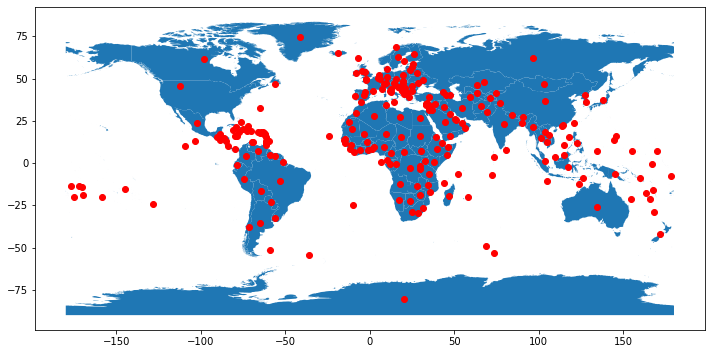

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
countries.plot(ax=ax)
country_centroids.plot(ax=ax, color='red') 

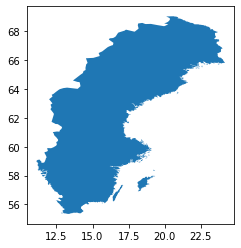

In [6]:
# Subset data to get only the country you
sweden = countries[countries["NAME"] == "Sweden"]
sweden.plot()

In [8]:
sweden.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
sweden_centroid = sweden.geometry.centroid
sweden_centroid.head()

54    POINT (16.75447 62.77710)
dtype: geometry

In [9]:
sweden_centroid.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

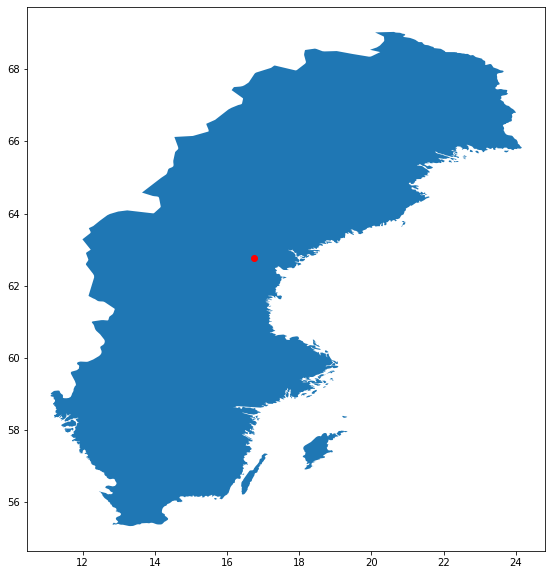

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
sweden.plot(ax=ax)
sweden_centroid.plot(ax=ax, color='red') 

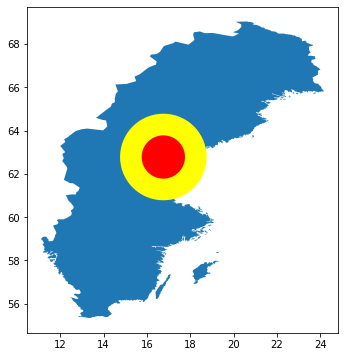

In [11]:
# Let us create a buffer of 1 & 2 degrees and plot them
sweden_centroids_1degree = sweden_centroid.buffer(1)
sweden_centroids_2degree = sweden_centroid.buffer(2)



fig, ax = plt.subplots(figsize=(8,6))
sweden.plot(ax=ax)
sweden_centroids_2degree.plot(ax=ax, color='yellow')
sweden_centroids_1degree.plot(ax=ax, color='red')
plt.show()



* Project to meter based Coordinate reference System 3006

In [12]:
sweden_centroid_projected = sweden_centroid.to_crs({'init': 'epsg:3006'})
sweden_projected = sweden.to_crs({'init': 'epsg:3006'})
sweden_centroid_projected.crs

C:\Users\Shakur\Anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Shakur\Anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Projected CRS: +init=epsg:3006 +type=crs>
Name: SWEREF99 TM
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Sweden
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

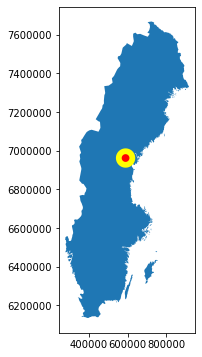

In [13]:
# Let us create a buffer of 20 km & 50 km and plot them
sweden_centroids_20km = sweden_centroid_projected.buffer(20000)
sweden_centroids_50km = sweden_centroid_projected.buffer(50000)

fig, ax = plt.subplots(figsize=(8,6))
sweden_projected.plot(ax=ax)
sweden_centroids_50km.plot(ax=ax, color='yellow')
sweden_centroids_20km.plot(ax=ax, color='red')

plt.show()

**Recap**
* `.centroid` --> Returns the center of the feaure (center point in polygon).
* `.buffer()` --> Calculates a circle buffer around the point
* It is important to know the projection of the data to get the desired distance (degrees vs. KM (meters))